# Climate Analysis and Exploration

In [12]:
#import dependencies
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import time

#create an engine that will interact with the SQL database
from sqlalchemy import create_engine, Column, Date, Integer, String, Float, Date, desc, func, inspect,and_

#create a session factory to bound to the engine the base and class defintions
from sqlalchemy.orm import Session
from sqlalchemy.ext.declarative import declarative_base

from sqlalchemy.ext.automap import automap_base
Base = automap_base()

#PyMySQL
import pymysql
pymysql.install_as_MySQLdb()

In [2]:
#collect start and end date of trips
date_entry=input("Enter a start date for your trip in YYYY-MM-DD format: ")
year,month,day=map(int,date_entry.split('-'))
start_date=datetime.date(year,month,day)

date_entry=input("Enter the end date for your trip in YYYY-MM-DD format: ")
year,month,day=map(int,date_entry.split('-'))
end_date=datetime.date(year,month,day)

Enter a start date for your trip in YYYY-MM-DD format: 2018-01-01
Enter the end date for your trip in YYYY-MM-DD format: 2018-01-15


In [7]:
engine=create_engine("sqlite:///hawaii.sqlite")

session=Session(engine)

In [8]:
inspector=inspect(engine)
tables=inspector.get_table_names()
for table in tables:
    print(table)
    columns = inspector.get_columns(table)
    for c in columns:
        print(c['name'],c['type'])
    print("\n")


measurments
id INTEGER
station VARCHAR(255)
date DATE
prcp FLOAT
tobs INTEGER


stations
id INTEGER
station VARCHAR(255)
name VARCHAR(255)
latitude FLOAT
longitude FLOAT
elevation FLOAT




In [11]:
#create engine and assign classes


#declare a base using automap base
Base=automap_base()

#Use the Base to reflect the database tables
Base.prepare(engine,reflect=True)

#Base.classes.keys()
Station=Base.classes.stations
Measurement=Base.classes.measurments


In [19]:
#Calculating Temperature
year_ago=end_date-datetime.timedelta(365)

pcp_year=session.query(Measurement.date,Measurement.prcp).filter(and_(Measurement.date <= end_date, Measurement.date >=year_ago)).all()

#create the dataframe and set date as index
pcp_df=pd.DataFrame(pcp_year, columns=["date","precipitation"])
pcp_df.set_index('date',inplace=True)

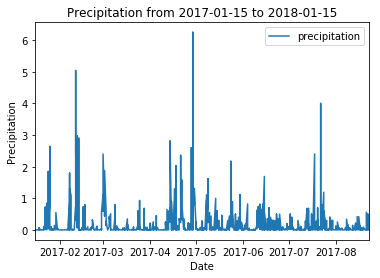

In [31]:
pcp_df.iloc[::-1].plot()
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Precipitation from %s to %s" %(year_ago,end_date))
plt.show()

In [23]:
pcp_df.describe()

,precipitation
count,1192.000000
mean,0.174329
std,0.465976
min,0.000000
25%,0.000000
50%,0.010000
75%,0.120000
max,6.250000
